In [229]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [230]:
#importing daily covid data for US and Italy cases. The Italy data is split up by regions and the US is not so we will need to combine the Italy regions

US_daily_covid_cases = pd.read_csv("..\\data\\raw\\USA_Covid_Data\\us_covid19_daily.csv")
Italy_region_daily_covid_cases = pd.read_csv("..\\data\\raw\\Italy_Covid_Data\\covid19_italy_region.csv")

In [231]:
# we care about the total datapoints accross all regions so we will groupby date and sum
Italy_daily_covid_cases = Italy_region_daily_covid_cases.groupby("Date").sum()
#region code is no longer important
Italy_daily_covid_cases = Italy_daily_covid_cases.drop("RegionCode",axis=1)

In [232]:
# summary statistics
US_daily_covid_cases.describe()


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,2.210000e+02,221.000000,2.210000e+02,2.210000e+02,179.000000,166.000000,179.000000,157.000000,158.000000,158.000000,...,202.000000,179.000000,2.210000e+02,2.210000e+02,2.210000e+02,221.00000,221.000000,221.000000,221.000000,221.000000
mean,2.020050e+07,45.036199,1.789319e+06,1.850704e+07,7509.675978,41164.006024,184439.072626,8690.898089,8790.170886,3319.525316,...,77307.183168,184439.072626,2.030245e+07,2.029636e+07,2.029636e+07,790.80543,1669.076923,318539.303167,26825.253394,345364.556561
std,2.106426e+02,21.388794,1.835068e+06,2.172689e+07,13753.115689,15071.244572,114424.281874,3197.062564,5084.229589,1626.464141,...,59435.830442,114424.281874,2.354745e+07,2.354934e+07,2.354934e+07,687.83371,1875.153838,275331.870615,21352.631245,294541.985010
min,2.020012e+07,1.000000,0.000000e+00,0.000000e+00,103.000000,325.000000,4.000000,1299.000000,74.000000,167.000000,...,0.000000,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,-2841.000000,0.000000,0.000000,0.000000
25%,2.020032e+07,56.000000,1.034200e+04,6.513100e+04,2120.500000,32457.250000,91137.500000,5930.000000,4521.250000,2260.000000,...,4566.500000,91137.500000,7.716000e+04,7.547300e+04,7.547300e+04,23.00000,10.000000,16525.000000,3082.000000,18025.000000
50%,2.020051e+07,56.000000,1.352463e+06,8.053622e+06,3307.000000,42533.000000,213260.000000,8487.000000,9334.000000,2707.000000,...,90196.000000,213260.000000,9.408074e+06,9.406085e+06,9.406085e+06,724.00000,1440.000000,290562.000000,25097.000000,309685.000000
75%,2.020070e+07,56.000000,2.890899e+06,3.287280e+07,4195.000000,53973.750000,270650.500000,10472.000000,12590.500000,4758.250000,...,126056.500000,270650.500000,3.576558e+07,3.576370e+07,3.576370e+07,1231.00000,2318.000000,597782.000000,42487.000000,638231.000000
max,2.020083e+07,56.000000,5.928381e+06,7.039719e+07,65709.000000,59940.000000,368866.000000,15130.000000,17401.000000,7070.000000,...,174768.000000,368866.000000,7.633672e+07,7.632557e+07,7.632557e+07,2752.00000,17320.000000,851205.000000,76844.000000,926440.000000


In [233]:
Italy_daily_covid_cases.describe()

,SNo,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
count,189.000000,189.000000,1.890000e+02,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,1.890000e+02
mean,41664.000000,903.972147,2.567451e+02,8849.227513,995.894180,9845.121693,31900.687831,41745.809524,1419.613757,119499.079365,25967.455026,187212.343915,2.156541e+06
std,24124.352686,0.000000,1.139888e-13,9764.692765,1271.855434,10996.703109,26076.616008,35247.867277,1645.038276,79687.812855,12468.691493,83841.045841,1.681315e+06
min,210.000000,903.972147,2.567451e+02,101.000000,26.000000,127.000000,94.000000,221.000000,78.000000,1.000000,7.000000,229.000000,0.000000e+00
25%,20937.000000,903.972147,2.567451e+02,844.000000,67.000000,909.000000,12090.000000,13303.000000,255.000000,32534.000000,19468.000000,152271.000000,0.000000e+00
50%,41664.000000,903.972147,2.567451e+02,4131.000000,293.000000,4367.000000,19629.000000,23156.000000,584.000000,150604.000000,33142.000000,231732.000000,2.330389e+06
75%,62391.000000,903.972147,2.567451e+02,15769.000000,1578.000000,17697.000000,52452.000000,72070.000000,2091.000000,195441.000000,34984.000000,243344.000000,3.607115e+06
max,83118.000000,903.972147,2.567451e+02,29010.000000,4068.000000,33004.000000,83652.000000,108257.000000,6557.000000,208536.000000,35477.000000,268218.000000,5.117788e+06


In [234]:
# set index to a datetime
US_daily_covid_cases["date_str"] = US_daily_covid_cases["date"].apply(str)
US_daily_covid_cases = US_daily_covid_cases.assign(datetime = lambda row: row.date_str.str[:4]+"-"+row.date_str.str[4:6]+"-"+row.date_str.str[6:])
US_daily_covid_cases["datetime"] = pd.to_datetime(US_daily_covid_cases["datetime"])
US_daily_covid_cases= US_daily_covid_cases.set_index(US_daily_covid_cases.datetime)

# remove dates from US dataset so that we have matching date indices
US_daily_covid_cases = US_daily_covid_cases.sort_index()
US_daily_covid_cases = US_daily_covid_cases[US_daily_covid_cases.datetime > datetime.datetime(2020,2,24)]

In [235]:
Italy_daily_covid_cases["date_str"] = Italy_daily_covid_cases.index
Italy_daily_covid_cases= Italy_daily_covid_cases.assign(datetime = lambda row: row.date_str.str[:10])
Italy_daily_covid_cases["datetime"] = pd.to_datetime(Italy_daily_covid_cases["datetime"])
Italy_daily_covid_cases= Italy_daily_covid_cases.set_index(Italy_daily_covid_cases.datetime)

Italy_daily_covid_cases = Italy_daily_covid_cases.sort_index()
Italy_daily_covid_cases = Italy_daily_covid_cases[Italy_daily_covid_cases.datetime > datetime.datetime(2020,2,24)]


In [236]:
tmpUS = pd.DataFrame({"date": US_daily_covid_cases.index,
         "tests": US_daily_covid_cases.totalTestResults,
         "positives": US_daily_covid_cases.positive
         })
tmpItaly = pd.DataFrame({"date": Italy_daily_covid_cases.index,
                         "tests": Italy_daily_covid_cases.TestsPerformed,
                         "positives": Italy_daily_covid_cases.TotalPositiveCases
         })

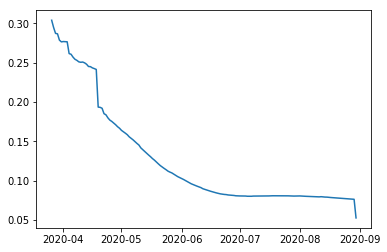

In [237]:
Combined_positivity_rate = pd.concat([tmpUS,tmpItaly])
Combined_positivity_rate= Combined_positivity_rate.groupby("date").sum()
Combined_positivity_rate = Combined_positivity_rate[Combined_positivity_rate.index > datetime.datetime(2020,3,25)]
Combined_positivity_rate["positivity_rate"] =  Combined_positivity_rate["positives"] / Combined_positivity_rate["tests"] 
plt.plot(Combined_positivity_rate["positivity_rate"])

In [238]:
tmpUS = pd.DataFrame({"date": US_daily_covid_cases.index,
         "hospitalized": US_daily_covid_cases.hospitalizedCumulative,
         "positives": US_daily_covid_cases.positive
         })
tmpItaly = pd.DataFrame({"date": Italy_daily_covid_cases.index,
                         "hospitalized": Italy_daily_covid_cases.TotalHospitalizedPatients,
                         "positives": Italy_daily_covid_cases.TotalPositiveCases
         })

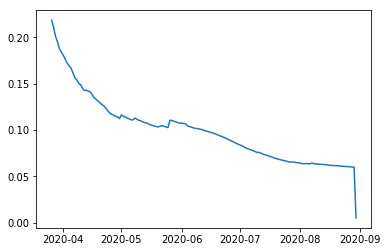

In [239]:
Combined_hospitalized_rate = pd.concat([tmpUS,tmpItaly])
Combined_hospitalized_rate = Combined_hospitalized_rate.groupby("date").sum()
Combined_hospitalized_rate = Combined_hospitalized_rate[Combined_hospitalized_rate.index > datetime.datetime(2020,3,25)]
Combined_hospitalized_rate["hospitalized_rate"] =  Combined_hospitalized_rate["hospitalized"] / Combined_hospitalized_rate["positives"] 
plt.plot(Combined_hospitalized_rate["hospitalized_rate"])

In [240]:
US_daily_covid_cases.columns

Index(['date', 'states', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dateChecked', 'death', 'hospitalized', 'lastModified',
       'total', 'totalTestResults', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease',
       'totalTestResultsIncrease', 'hash', 'date_str', 'datetime'],
      dtype='object')

In [214]:
Italy_daily_covid_cases.columns

Index(['SNo', 'Latitude', 'Longitude', 'HospitalizedPatients',
       'IntensiveCarePatients', 'TotalHospitalizedPatients', 'HomeConfinement',
       'CurrentPositiveCases', 'NewPositiveCases', 'Recovered', 'Deaths',
       'TotalPositiveCases', 'TestsPerformed', 'date_str', 'datetime'],
      dtype='object')